# Week 5
## Multivariate Method - Boosted Decision Trees

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
from scipy.stats import binom, poisson, norm
from iminuit import Minuit
import iminuit
from matplotlib import cm, colors
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import itertools
r = np.random

sys.path.append('C:\\Users\\Bruger\\AppStat2021\\External_Functions')
import Clotilde_external_functions as cef
import ExternalFunctions as ef

sys.path.append('C:\\Users\\Bruger\\AMAS')
import AMASfunctions as af

from matplotlib import style
plt.style.use("seaborn-white")
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 14

import numpy.random as r
from random import sample
r.seed(42)

import seaborn as sns
sns.set_palette('Dark2',5 , 1)

## Exercise 1

In [3]:
bg_test = np.genfromtxt('BDT_background_test.txt')
bg_train = np.genfromtxt('BDT_background_train.txt')
signal_test = np.genfromtxt('BDT_signal_test.txt')
signal_train = np.genfromtxt('BDT_signal_train.txt')

In [29]:
bg_test_x = bg_test[:,0]
bg_test_y = bg_test[:,1]
bg_test_z = bg_test[:,2]
bg_train_x = bg_train[:,0]
bg_train_y = bg_train[:,1]
bg_train_z = bg_train[:,2]

signal_test_x = signal_test[:,0]
signal_test_y = signal_test[:,1]
signal_test_z = signal_test[:,2]
signal_train_x = signal_train[:,0]
signal_train_y = signal_train[:,1]
signal_train_z = signal_train[:,2]

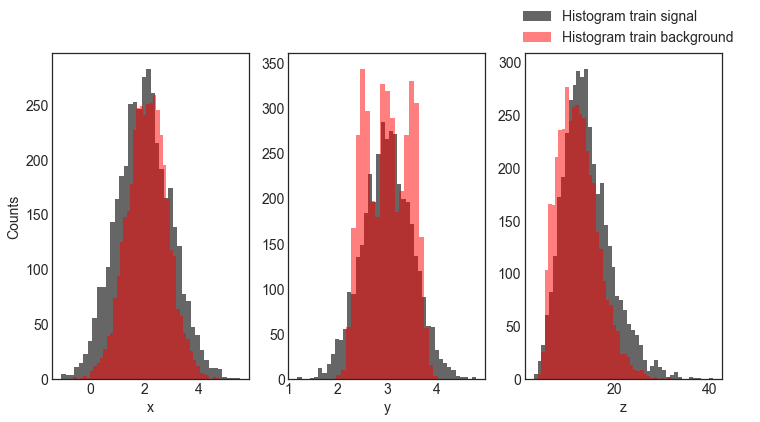

In [71]:
# 1d histograms of background

fig, axs = plt.subplots(1,3, figsize=(12,6))

axs[0].hist(signal_train_x, bins='auto', color='k', label='Histogram train signal', alpha=0.6)
axs[1].hist(signal_train_y, bins='auto', color='k', alpha=0.6)
axs[2].hist(signal_train_z, bins='auto', color='k', alpha=0.6)
axs[0].hist(bg_train_x, bins='auto', color='red', label='Histogram train background', alpha=0.5)
axs[1].hist(bg_train_y, bins='auto', color='red', alpha=0.5)
axs[2].hist(bg_train_z, bins='auto', color='red', alpha=0.5)
axs[0].set_xlabel('x')
axs[1].set_xlabel('y')
axs[2].set_xlabel('z')
axs[0].set_ylabel('Counts')
fig.legend(loc=(0.68,0.88))

In [125]:
len(signal_train_x)/len(signal_test_x)

2.0

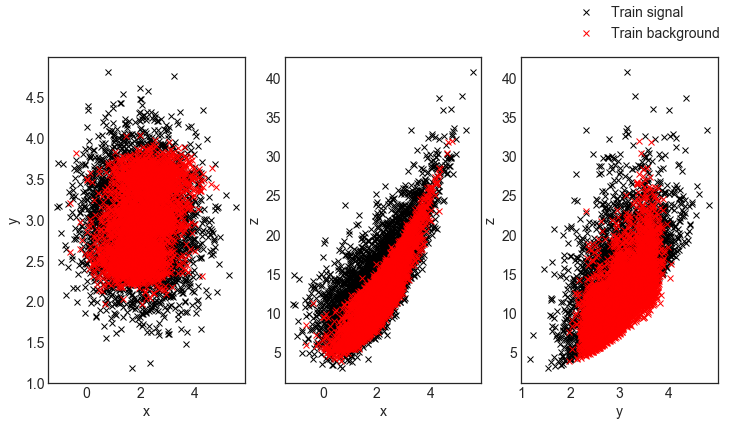

In [64]:
# 2d plots of train data
fig, axs = plt.subplots(1,3, figsize=(12,6))

axs[0].plot(signal_train_x, signal_train_y, 'kx', label='Train signal')
axs[1].plot(signal_train_x, signal_train_z, 'kx')
axs[2].plot(signal_train_y, signal_train_z, 'kx')
axs[0].plot(bg_train_x, bg_train_y, 'rx', label='Train background')
axs[1].plot(bg_train_x, bg_train_z, 'rx')
axs[2].plot(bg_train_y, bg_train_z, 'rx')
axs[0].set_xlabel('x')
axs[1].set_xlabel('x')
axs[2].set_xlabel('y')
axs[0].set_ylabel('y')
axs[1].set_ylabel('z')
axs[2].set_ylabel('z')
fig.legend(loc=(0.75,0.89));

In [74]:
train = np.concatenate((signal_train, bg_train))
train_class = np.concatenate((np.ones(len(signal_train)), np.zeros(len(bg_train))))

test = np.concatenate((signal_test, bg_test))
test_class = np.concatenate((np.ones(len(signal_test)), np.zeros(len(bg_test))))

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), algorithm="SAMME", n_estimators=200)
clf = clf.fit(train, train_class)

In [111]:
twoclass_output = clf.decision_function(test)

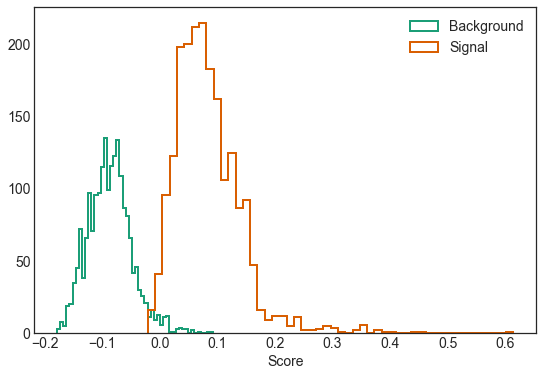

In [112]:
fig, ax = plt.subplots(figsize=(9,6))

ax.hist(twoclass_output[test_class==0], bins=50, label='Background', histtype='step', linewidth=2)
ax.hist(twoclass_output[test_class==1], bins=50, label='Signal', histtype='step', linewidth=2)
ax.set_xlabel('Score')
ax.legend();

## Exercise 2

In [126]:
from sklearn.model_selection import train_test_split

var16 = np.genfromtxt('BDT_16var.txt')

var16_train, var16_test = train_test_split(var16, train_size=0.65, test_size=0.35)

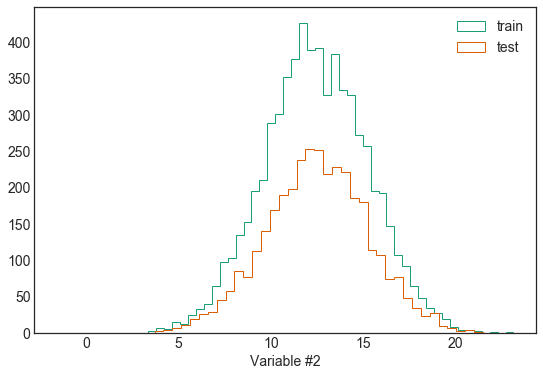

In [127]:
fig, ax = plt.subplots(figsize=(9,6))
ax.hist(var16_train[:,1], bins=50, label='train', histtype='step')
ax.hist(var16_test[:,1], bins=50, label='test', histtype='step')
ax.set_xlabel('Variable #2')
ax.legend();

In [129]:
class16 = np.zeros(len(var16[:,0]), dtype=int)
class16_train[::2]=1

len(class16)

6500